In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Create a df based on the genres data collected in other steps and reduce it down to key columns for song attributes
df = pd.read_csv('C:/Users/trist/OneDrive/Desktop/SpotIpy_Models/All Data/Processed Data/genres_41k.csv')
df_target = pd.read_csv('C:/Users/trist/Labelled_Data.csv')

df = pd.merge(df,df_target,on=['artist','track'],how='inner')

In [3]:
label_list = df['cat_numbers'].unique()
df_balanced = pd.DataFrame()
for label in label_list:
    print(label)
    df_round = df[df['cat_numbers']==label][:1000]
    print(df_round)
    df_balanced = df_balanced.append(df_round)

Country
                   track                                  artist  \
0              Lucky Man                       Montgomery Gentry   
4        I Got A Feelin'                        Billy Currington   
6      Where I Come From                            Alan Jackson   
7     Nothin' To Die For                              Tim McGraw   
9           Amarillo Sky                            Jason Aldean   
...                  ...                                     ...   
7608            Beachin'                               Jake Owen   
7609  Drowns The Whiskey  Jason Aldean Featuring Miranda Lambert   
7611                Neon                             Chris Young   
7618       God's Country                           Blake Shelton   
7625    El Cerrito Place                           Kenny Chesney   

                                       uri  danceability  energy  key  \
0     spotify:track:4GiXBCUF7H6YfNQsnBRIzl         0.578   0.471    4   
4     spotify:track:1tF370eYX

In [4]:
df_balanced.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,genres,Unnamed: 0,cat_numbers
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.3680,...,0.532,133.061,196707,4,30.88059,13,1,"['contemporary country', 'country', 'country r...",0,Country
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.3630,...,0.631,112.098,193760,4,22.62384,10,1,"['contemporary country', 'country', 'country r...",4,Country
6,Where I Come From,Alan Jackson,spotify:track:6ej1QJ8eIYmhsyTlvgDajy,0.726,0.631,11,-8.136,0,0.0334,0.2200,...,0.746,124.711,239240,4,35.59732,10,1,"['contemporary country', 'country', 'country r...",7,Country
7,Nothin' To Die For,Tim McGraw,spotify:track:3lRSz6HujrSy9b3LXg2Kq9,0.481,0.786,10,-5.654,1,0.0288,0.0538,...,0.389,153.105,253640,4,19.65701,11,1,"['contemporary country', 'country', 'country r...",8,Country
9,Amarillo Sky,Jason Aldean,spotify:track:0axUHkhMMY0YSC1jFBVWqv,0.491,0.776,2,-3.887,1,0.0393,0.3140,...,0.428,154.988,202547,4,37.86861,9,1,"['contemporary country', 'country', 'country r...",10,Country


In [5]:
#Drop irrelevant columns
df_balanced = df_balanced.drop(columns=['track','artist','uri','target','genres','Unnamed: 0','key','time_signature','chorus_hit','sections'])

In [25]:
df_balanced.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit,sections,cat_numbers
0,0.578,0.471,-7.270,1,0.0289,0.3680,0.0,0.1590,0.532,133.061,196707,30.88059,13,Country
4,0.630,0.764,-4.353,1,0.0275,0.3630,0.0,0.1250,0.631,112.098,193760,22.62384,10,Country
6,0.726,0.631,-8.136,0,0.0334,0.2200,0.0,0.1930,0.746,124.711,239240,35.59732,10,Country
7,0.481,0.786,-5.654,1,0.0288,0.0538,0.0,0.0759,0.389,153.105,253640,19.65701,11,Country
9,0.491,0.776,-3.887,1,0.0393,0.3140,0.0,0.1460,0.428,154.988,202547,37.86861,9,Country


In [6]:
# #Let's preprocess the categorical columns (key, time signature)
# one_hot = OneHotEncoder()

# one_hot_array_time_sig = one_hot.fit_transform(df_balanced['time_signature'].values.reshape(-1,1)).toarray()

# one_hot_array_key = one_hot.fit_transform(df_balanced['key'].values.reshape(-1,1)).toarray()

# time_sig_df = pd.DataFrame(one_hot_array_time_sig, columns = ["time_sig_"+str(int(i)) for i in range(one_hot_array_time_sig.shape[1])])

# key_df = pd.DataFrame(one_hot_array_key, columns = ["key_"+str(int(i)) for i in range(one_hot_array_key.shape[1])])

# df_balanced = df_balanced.drop(['time_signature', 'key'], axis=1)

# df_balanced = pd.concat([df_balanced,time_sig_df,key_df],axis=1)

# df_balanced.head()

In [7]:
df_results = df_balanced['cat_numbers']
df_features = df_balanced.drop(columns=['cat_numbers'], axis=1)

In [8]:
df_results.head()

0    Country
4    Country
6    Country
7    Country
9    Country
Name: cat_numbers, dtype: object

In [9]:
#Use robust scaler since there are definitely outliers in the dataset 
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

features = scaler.fit_transform(df_features)

In [10]:
#Now that we have fully preprocessed, train test split
X_train, X_test, Y_train, Y_test = train_test_split(features, df_results, 
                                                    test_size=0.2, random_state=42)

In [11]:
#Create a list of models to loop through for performance at baseline level
model_list = [DummyClassifier(strategy="stratified"),
              LogisticRegression(),RandomForestClassifier(random_state=42),
              KNeighborsClassifier(n_neighbors=5),LinearSVC(random_state=42)]

#Cross validate 5x
cv = 5

#Store list of tuples to create df
tuples = []

#Iterate through models and check for CV
for m in model_list:
    cv_acc = np.mean(cross_val_score(m,features,df_results))
    
    
    #fit
    m.fit(X_train,Y_train)
    
    #predict
    train_pred = m.predict(X_train)
    test_pred = m.predict(X_test)
    
    #Accuracy test stored in values
    test_acc = accuracy_score(test_pred,Y_test)
    
    tuples.append((m,test_acc,cv_acc))
    
tuples_df = pd.DataFrame(tuples,columns=["Model","Test Accuracy","CV Accuracy"])

In [12]:
#Select optimal model
tuples_df.head()

,Model,Test Accuracy,CV Accuracy
0,DummyClassifier(strategy='stratified'),0.121875,0.116750
1,LogisticRegression(),0.500625,0.470125
2,"(DecisionTreeClassifier(max_features='auto', r...",0.706875,0.530750
3,KNeighborsClassifier(),0.546250,0.421375
4,LinearSVC(random_state=42),0.488750,0.463625


In [13]:
#Tune Hyperparameters for LogReg
c_values = np.logspace(-1,5, 100)

accuracies = []
#Iterate through C_values
for c in c_values:
    
    #Instantiate
    logreg_model = LogisticRegression(C=c, max_iter=10000)
    
    #fit
    logreg_model.fit(X_train,Y_train)
    
    #predict
    train_pred = logreg_model.predict(X_train)
    test_pred = logreg_model.predict(X_test)
    
    #Accuracy on train
    train_acc = accuracy_score(train_pred,Y_train)
    
    #Accuracy on test
    test_acc = accuracy_score(test_pred,Y_test)
    
    #Add pairing to list so convert to df to view results
    accuracies.append((c,train_acc,test_acc))

logreg_results = pd.DataFrame(accuracies, columns=['Regularization Parameter','Train Accuracy','Test_Accuracy'])

In [14]:
logreg_results['Test_Accuracy'].max()

0.505

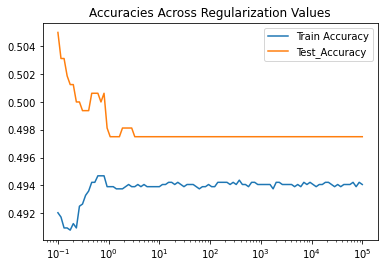

In [15]:
for col in ['Train Accuracy','Test_Accuracy']:
    plt.plot(logreg_results['Regularization Parameter'],logreg_results[col],label=col)
    plt.legend()
    plt.xscale('log')
    plt.title('Accuracies Across Regularization Values')
plt.show()

In [16]:
#Tune Hyperparameters for KNN
neighbors = [x for x in range(1,50)]

accuracies = []
#Iterate through C_values
for n in neighbors:
    
    #Instantiate
    knn_model = KNeighborsClassifier(n_neighbors=n)
    
    #fit
    knn_model.fit(X_train,Y_train)
    
    #predict
    train_pred = knn_model.predict(X_train)
    test_pred = knn_model.predict(X_test)
    
    #Accuracy on train
    train_acc = accuracy_score(train_pred,Y_train)
    
    #Accuracy on test
    test_acc = accuracy_score(test_pred,Y_test)
    
    #Add pairing to list so convert to df to view results
    accuracies.append((n,train_acc,test_acc))

knn_results = pd.DataFrame(accuracies, columns=['Regularization Parameter','Train Accuracy','Test_Accuracy'])

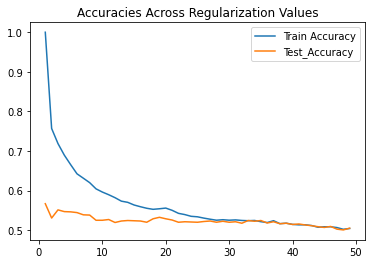

In [17]:
for col in ['Train Accuracy','Test_Accuracy']:
    plt.plot(knn_results['Regularization Parameter'],knn_results[col],label=col)
    plt.legend()
    plt.title('Accuracies Across Regularization Values')
plt.show()

In [18]:
knn_results['Test_Accuracy'].max()

0.566875

In [19]:
#Random Forest cross val by checking out randomsearchCV

accuracies = []

depths = [x for x in range(1,101,5)]
trees = [x for x in range(1,101,5)]

param_grid = {
    'max_depth': depths,
    'n_estimators': trees}


random_forest_model = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy',random_state=42)

#Fit 
random_forest_model.fit(X_train,Y_train)

#Predict
rf_train_preds = random_forest_model.predict(X_train)
rf_test_preds = random_forest_model.predict(X_test)

#Report Out
rf_test_acc = accuracy_score(rf_test_preds,Y_test)
rf_train_acc = accuracy_score(rf_train_preds,Y_train)

accuracies.append((random_forest_model,rf_train_acc,rf_test_acc))
    
rf_df = pd.DataFrame(accuracies, columns=['Model','Train Accuracy','Test_Accuracy'])

In [20]:
rf_df['Test_Accuracy'].max()

0.689375

In [21]:
confusion_matrix(rf_test_preds,Y_test)

array([[165,   2,   3,   8,  31,  17,   2,  13],
       [  1, 145,   2,   6,  11,  10,   8,  11],
       [  4,   6, 170,  16,   5,  10,   1,   9],
       [  2,   3,  15, 116,   5,   8,   0,   8],
       [ 17,  13,   2,   8,  92,  21,  14,  11],
       [  3,   9,   4,   9,  11, 106,  22,   6],
       [  5,   9,   0,  10,  11,  33, 174,   3],
       [  6,  13,   1,  19,  17,   2,   1, 135]], dtype=int64)

In [22]:
#Define the best model
index_best = rf_df[rf_df['Test_Accuracy']==rf_df['Test_Accuracy'].max()]
best_model = index_best['Model'][0]
best_model

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [1, 6, 11, 16, 21, 26, 31,
                                                      36, 41, 46, 51, 56, 61,
                                                      66, 71, 76, 81, 86, 91,
                                                      96],
                                        'n_estimators': [1, 6, 11, 16, 21, 26,
                                                         31, 36, 41, 46, 51, 56,
                                                         61, 66, 71, 76, 81, 86,
                                                         91, 96]},
                   random_state=42, scoring='accuracy')

In [23]:
import pickle
#Pickle the model so it can be sent to production
pickle.dump (best_model, open('genre_pred_model_attrib.pickle', 'wb'))

In [24]:
#Also pickle the vectorizer since it is needed to process the data
pickle.dump (RobustScaler().fit(df_features),open('scaler.pickle', 'wb'))